In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import itertools
from scipy.signal import savgol_filter
import matplotlib.image as mpimg
from scipy.ndimage import gaussian_filter, laplace
from scipy import ndimage
from scipy import interpolate
from mpl_toolkits import mplot3d
from PIL import Image
%matplotlib inline
import IPython
import pickle
# from vtk.util import numpy_support
# import vtk
import pyvista as pv
import numpy as np

In [2]:
def plot(traj_x,traj_y, traj_z, animation = True):
    fig = go.Figure()

    fig.add_trace(
        go.Scatter3d(
            x=traj_x,
            y=traj_z,
            z=traj_y,
            mode='lines',
            line=dict(
                color='red',
                width = 7
            ),
            name='survey_interpolated'
        ),
    )
    fig.update_layout(scene = dict(
                  #  xaxis_title='X AXIS TITLE',
                    yaxis_title='Drilling direction',
                    zaxis_title='True vertical depth (TVD)'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

    fig.update_scenes(zaxis_autorange="reversed")
    fig.show()
    

In [3]:
# import 3d cube
file = open("3D_301.833.2055.pickle",'rb')
cube_3d = pickle.load(file)

In [4]:
volume_cut= cube_3d[:,0::3,0::4]
volume_cut.shape

(301, 278, 514)

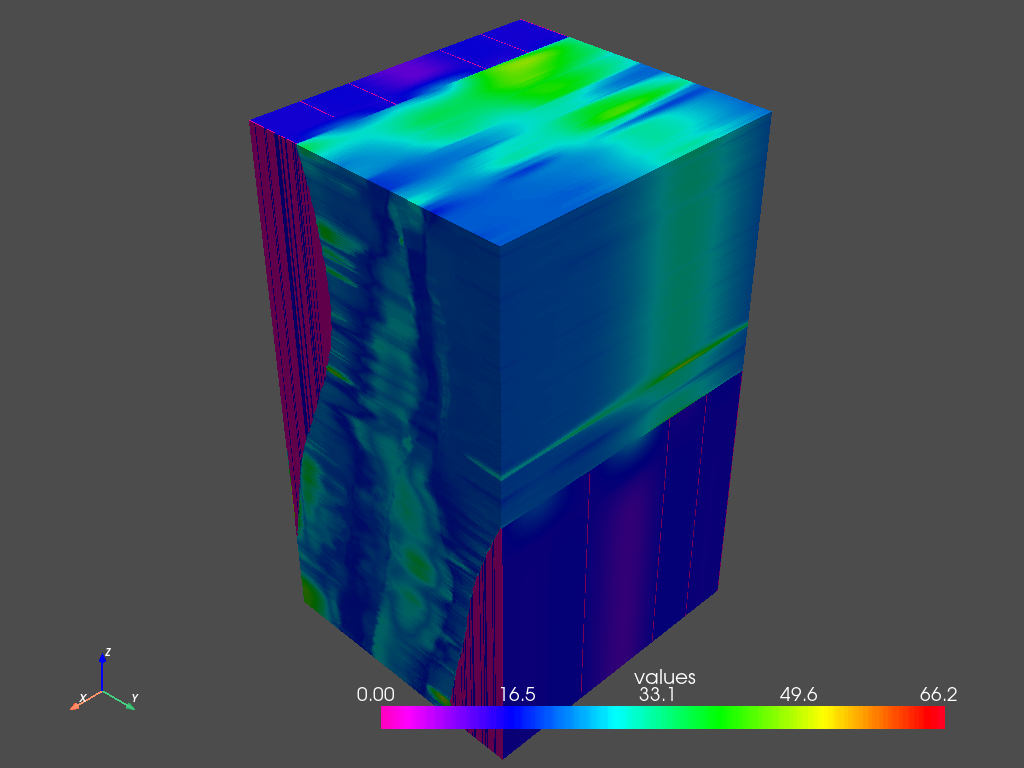

In [5]:
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(volume_cut.shape) + 1

# Edit the spatial reference
grid.origin = (300,300, 514)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = volume_cut.flatten(order="F")  # Flatten the array!


# Now plot the grid!
grid.plot(show_edges=False, jupyter_backend='ipykernel', cmap= 'gist_rainbow_r')
#grid.plot(show_edges=False, jupyter_backend='ipygany', cmap= 'RdYlGn')


In [18]:
import welleng as we
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

In [19]:
carts = []
for i in range(0,len(traj_x)):
    carts.append([traj_x_filtered[i], traj_z_filtered[i], traj_y_filtered[i]])
    

NameError: name 'traj_x' is not defined

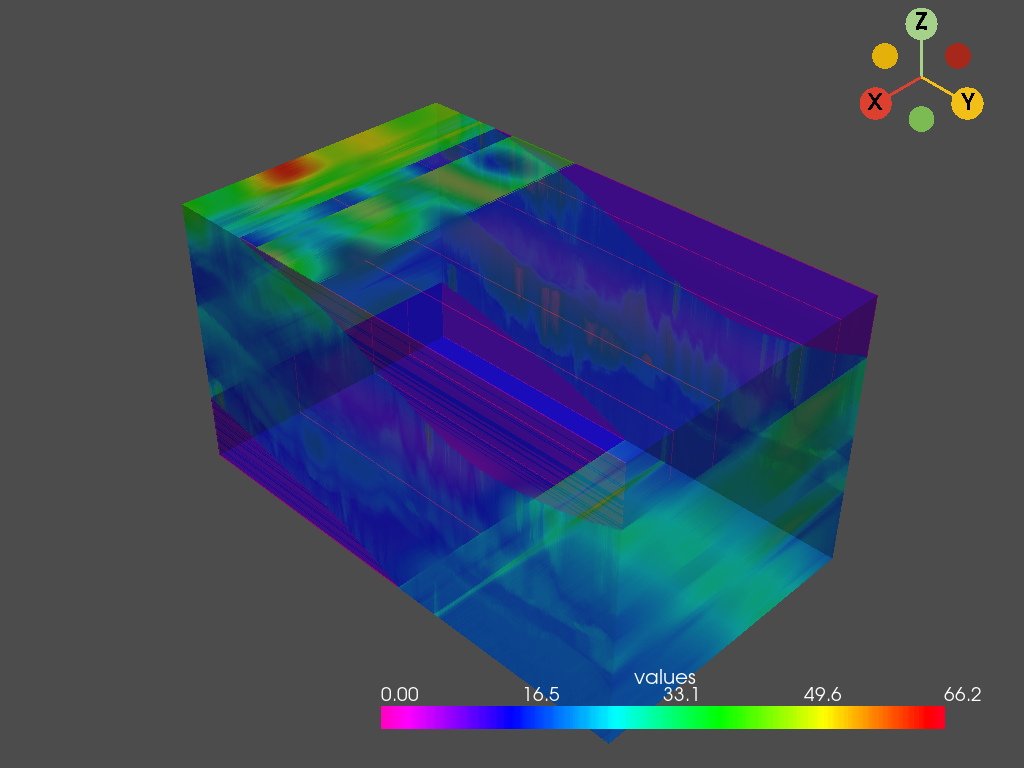

In [13]:
# # add scalars to spline and plot it
# spline["scalars"] = np.arange(spline.n_points)
# tube = spline.tube(radius=1)
#grid.plot(show_edges=False, jupyter_backend='ipykernel', cmap = 'gist_rainbow_r')
# tube.plot(smooth_shading=True, jupyter_backend='ipykernel', line_width=4, color="k")

plotter = pv.Plotter() 
actor = plotter.add_mesh(grid, label = 'grid', opacity=0.6, cmap = 'gist_rainbow_r')
#plotter.add_mesh(traj, label = 'trajectory', color = 'k') 
plotter.add_camera_orientation_widget()
#plotter.add_legend() 
actor.rotate_x(-90)
actor.orientation  
plotter.show('ipykernel')    
# jupyter_backend='ipykernel'

In [ ]:
spline = pv.Spline(traj, 503)
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=1)

In [ ]:
# carts = [
#     [0., 0., 0.],
#     [0., 0., 300.],
#     [0., 1000., 1000.],
#     [-1000, -1000, 2000]
# ]

# Push the points to the connect_points function to generate a survey
connections = we.connector.connect_points(
    carts,
    vec_start=[0, 0, 1],
    dls_design=2.0,
    nev=True,
    # step=30,
    md_start=0.
)
survey = we.survey.from_connections(connections, step=30)

# Generate a mesh for plotting
mesh = we.mesh.WellMesh(
    survey,
    method='circle'
).mesh

# Plot the results
we.visual.plot(mesh, points=carts)

# Animation

In [18]:
import chart_studio.plotly as py
import plotly.express as px

ModuleNotFoundError: No module named 'chart_studio'

In [ ]:
frame = []

for i in range(0,len(traj_x),5):
    frame.append(go.Frame(data=[go.Scatter3d(x=traj_x[:i],y=traj_y[:i],z = traj_z[:i], mode="lines")])) #1

In [ ]:


fig = go.Figure(
    data =[go.Scatter3d(
        x=traj_x,
            y=traj_y,
            z=traj_z,
            mode='lines',
            line=dict(
                color='red',
                width = 7
            ),
            name='survey_interpolated'
        )],
    layout = go.Layout(
    title = 'Trajectory of greedy algorithm',
   # scene_aspectmode="cube",
    scene = dict(
                xaxis = dict(range=[0,310], nticks=10, autorange=True),
                yaxis = dict(range=[0,300], nticks=10, autorange=True),
                zaxis = dict(range=[0,500], nticks=10, autorange=True),
                aspectmode='manual'),
    
    updatemenus = [dict(type = 'buttons',
                    buttons = [dict(label = 'Play',
                                   method = 'animate',
                                   args = [None])])],),
    
    
    frames = frame)
    
    


fig.update_scenes(zaxis_autorange="reversed")
fig.update_layout()